# Data Generation Post-processing -- Data Sets Comparison

In [1]:
from matplotlib import offsetbox
from collections import defaultdict
from scipy.stats import spearmanr
from scipy.spatial.distance import squareform
from scipy.cluster import hierarchy
import os
from utils_pp_standalone import *
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np
from sklearn.manifold import Isomap
from sklearn.decomposition import PCA, KernelPCA
#import seaborn as sns
from scipy.stats import pointbiserialr
from collections import defaultdict
import re

In [2]:
plt.rcParams.update({"figure.figsize": [8, 4],
                     "text.usetex": True,
                     "font.family": "serif",
                     "font.serif": "Computer Modern",
                     "axes.labelsize": 20,
                     "axes.titlesize": 20,
                     'figure.titlesize': 20,
                     "legend.fontsize": 20,
                     "xtick.labelsize": 16,
                     "ytick.labelsize": 16,
                     "savefig.dpi": 130,
                    'legend.fontsize': 20,
                     'legend.handlelength': 2,
                     'legend.loc': 'upper right'})

## Data description

In [3]:
path = '../results/'

dir_names=[dir_name for dir_name in os.listdir(path) if '_4909' in dir_name]# or '_3518' in dir_name]# if dir_name.startswith('datagen') and 'zip' not in dir_name]#

results_dataframes_datasets=dict()
dataset_ID_list=[]

for dir_name in dir_names:
    path_results = os.path.join(path, dir_name)

    dataset_ID = dir_name[-5:]
    dataset_ID_list.append(dataset_ID)
    results_dataframes_datasets[dataset_ID], csv_files = open_csv(
        path_results, ['cases_df.csv', 'case_df_op.csv'])

    perc_stability(results_dataframes_datasets[dataset_ID]['case_df_op'], dir_name)
    


%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
datagen_ACOPF_LF09_seed3_nc3_ns20_d5_20250915_145439_4909
$|\mathcal{D}|$: 3660
Feasible cases: 16.775956284153004%
Stable cases: 7.240437158469945% of total cases
Stable cases: 43.159609120521175% of feasible cases
Unfeasible cases: 7.4043715846994544%
Out of cell cases: 75.81967213114754%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%


**Data Set 7664**:
- Entropy <u>is not</u> considered as cut-off criteria in the data generation process
- Fasibility ratio <u>is</u> considered as cut-off criteria in the data generation process, rel_tolerance = 0.01 (if feasibility ratio in the cell is less then 0.01 the cell dies? correct?)
- max_depth = 7

**Data Set 7665**:
- Entropy <u>is</u> considered as cut-off criteria in the data generation process, (what was the threshold for entropy decrese to kill the cell?)
- Fasibility ratio <u>is also</u> considered as cut-off criteria in the data generation process, rel_tolerance = 0.01 (if feasibility ratio in the cell is less then 0.01 the cell dies? correct?)
- max_depth = 7


In [4]:
columns_in_df_DS = dict()

for dataset_ID in dataset_ID_list:
    columns_in_df = dict()
    for key, item in results_dataframes_datasets[dataset_ID].items():
        columns_in_df[key] = list(results_dataframes_datasets[dataset_ID][key].columns)
    columns_in_df_DS[dataset_ID]=columns_in_df

In [5]:
def print_columns_groups(key, columns_list):
    # Group columns by the alphabetic prefix
    groups = defaultdict(list)
    for col in columns_list:
        match = re.match(r"([A-Za-z_]+)", col)  # extract the prefix before any digit
        prefix = match.group(1) if match else col
        groups[prefix].append(col)
    
    print(key+':\n')

    # Print grouped columns
    for prefix, cols in groups.items():
        print(f"{prefix}: {cols[0]},...,{cols[-1]}; N. elements: {len(cols)}\n")
        
for key, item in columns_in_df_DS[dataset_ID_list[0]].items():
    print_columns_groups(key, item)

cases_df:

p_sg_Var: p_sg_Var0,...,p_sg_Var2; N. elements: 3

q_sg_Var: q_sg_Var0,...,q_sg_Var2; N. elements: 3

p_cig_Var: p_cig_Var0,...,p_cig_Var2; N. elements: 3

p_g_for_Var: p_g_for_Var0,...,p_g_for_Var2; N. elements: 3

p_g_fol_Var: p_g_fol_Var0,...,p_g_fol_Var2; N. elements: 3

q_cig_Var: q_cig_Var0,...,q_cig_Var2; N. elements: 3

q_g_for_Var: q_g_for_Var0,...,q_g_for_Var2; N. elements: 3

q_g_fol_Var: q_g_fol_Var0,...,q_g_fol_Var2; N. elements: 3

perc_g_for_Var: perc_g_for_Var0,...,perc_g_for_Var0; N. elements: 1

tau_droop_f_gfor_: tau_droop_f_gfor_1,...,tau_droop_f_gfor_3; N. elements: 2

tau_droop_u_gfor_: tau_droop_u_gfor_1,...,tau_droop_u_gfor_3; N. elements: 2

tau_droop_f_gfol_: tau_droop_f_gfol_1,...,tau_droop_f_gfol_3; N. elements: 2

tau_droop_u_gfol_: tau_droop_u_gfol_1,...,tau_droop_u_gfol_3; N. elements: 2

p_load_Var: p_load_Var0,...,p_load_Var2; N. elements: 3

q_load_Var: q_load_Var0,...,q_load_Var2; N. elements: 3

case_id: case_id,...,case_id; N. elements: 1

### General Description

- cases_df: sampled quantities

    - p_X_Var, q_X_Var: N. elements: 53, P and Q in each generation unit from each typer of element (X = [sg, cig, g_for, g_fol]) (=0 where the element is not present) [MW, Mvar]

    - perc_g_for_Var: N. elements: 1

    - tau_droop_f_X_,tau_droop_u_X_ : N. elements: 53, taus de cada convertidor (X = [gfor, gfol])

    - p_load_Var, q_load_Var: N. elements: 91, P and Q of each load [MW, Mvar]

    - case_id: N. elements: 1

    - Stability: N. elements: 1 =1: stable, =0 unstable, = -1: unfeasible, =-2 feasible but to a point out of the sampling cell
 
- case_df_op: after power flow quantities

    - V, theta:  N. elements: 118
    - P_SG, Q_SG, Sn_SG: N. elements: 47, P and Q injected by SG in p.u. and installed capacity in MVA (of the SGs effectively present in the grid)
    - P_X, Q_X, Sn_X: N. elements: 18, P and Q injected by X in p.u. and installed capacity in MVA. X is GFOL or GFOR, if the converter is not included in the grid there is a NaN value.

    - PL, QL: N. elements: 91  P and Q of each load p.u.

    - case_id: case_id,...,case_id; N. elements: 1

    - Stability: N. elements: 1 =1: stable, =0 unstable, = -1: unfeasible, =-2 feasible but to a point out of the sampling cell


In [6]:
# %% ---- FILL NAN VALUES WITH NULL ---

for dataset_ID in dataset_ID_list:

    results_dataframes_datasets[dataset_ID]['case_df_op'] = results_dataframes_datasets[dataset_ID]['case_df_op'].fillna(0)
    
    # %% ---- FIX VALUES ----
    
    Sn_cols = [col for col in results_dataframes_datasets[dataset_ID]['case_df_op']
               if col.startswith('Sn')]
    results_dataframes_datasets[dataset_ID]['case_df_op'][Sn_cols] = results_dataframes_datasets[dataset_ID]['case_df_op'][Sn_cols]/100 #p.u. system base 100 MVA
    
    theta_cols = [col for col in results_dataframes_datasets[dataset_ID]['case_df_op']
                  if col.startswith('theta')]
    # Adjust angles greater than 180°
    results_dataframes_datasets[dataset_ID]['case_df_op'][theta_cols] = results_dataframes_datasets[dataset_ID]['case_df_op'][theta_cols] - \
        (results_dataframes_datasets[dataset_ID]['case_df_op'][theta_cols] > 180) * 360
    
    results_dataframes_datasets[dataset_ID]['case_df_op'][theta_cols] = results_dataframes_datasets[dataset_ID]['case_df_op'][theta_cols] * np.pi/180
    
    # add total demand variables
    PL_cols = [
        col for col in results_dataframes_datasets[dataset_ID]['case_df_op'].columns if col.startswith('PL')]
    results_dataframes_datasets[dataset_ID]['case_df_op']['PD'] = results_dataframes_datasets[dataset_ID]['case_df_op'][PL_cols].sum(
        axis=1)
    
    QL_cols = [
        col for col in results_dataframes_datasets[dataset_ID]['case_df_op'].columns if col.startswith('QL')]
    results_dataframes_datasets[dataset_ID]['case_df_op']['QD'] = results_dataframes_datasets[dataset_ID]['case_df_op'][QL_cols].sum(
        axis=1)


### Data Set Composition

In [7]:
for dataset_ID in dataset_ID_list:

    perc_stability(results_dataframes_datasets[dataset_ID]['case_df_op'], dir_name)

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
datagen_ACOPF_LF09_seed3_nc3_ns20_d5_20250915_145439_4909
$|\mathcal{D}|$: 3660
Feasible cases: 16.775956284153004%
Stable cases: 7.240437158469945% of total cases
Stable cases: 43.159609120521175% of feasible cases
Unfeasible cases: 7.4043715846994544%
Out of cell cases: 75.81967213114754%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%


In [8]:
# %% ---- SELECT ONLY FEASIBLE CASES ----
case_id_feasible_DS = dict()
case_id_Unfeasible_DS = dict()
case_id_Unfeasible1_DS = dict()
case_id_Unfeasible2_DS = dict()

for dataset_ID in dataset_ID_list:

    # from data frame with power flow results: case_df_op
    results_dataframes_datasets[dataset_ID]['case_df_op_feasible'] = results_dataframes_datasets[dataset_ID]['case_df_op'].query(
        'Stability >= 0')
    
    # from data frame with sampled quantities: cases_df
    results_dataframes_datasets[dataset_ID]['cases_df_feasible'] = results_dataframes_datasets[dataset_ID]['cases_df'].query(
        'Stability >= 0')
    case_id_feasible_DS[dataset_ID] = list(results_dataframes_datasets[dataset_ID]['case_df_op_feasible']['case_id'])
    
    # %% ---- SELECT ONLY UNFEASIBLE CASES (from data frame with sampled quantities: cases_df)----
    
    results_dataframes_datasets[dataset_ID]['cases_df_unfeasible'] = results_dataframes_datasets[dataset_ID]['cases_df'].query('Stability < 0')
    results_dataframes_datasets[dataset_ID]['cases_df_unfeasible_1'] = results_dataframes_datasets[dataset_ID]['cases_df'].query('Stability == -1')
    results_dataframes_datasets[dataset_ID]['cases_df_unfeasible_2'] = results_dataframes_datasets[dataset_ID]['cases_df'].query('Stability == -2')
    
    case_id_Unfeasible_DS[dataset_ID] = list(results_dataframes_datasets[dataset_ID]['cases_df_unfeasible']['case_id'])
    case_id_Unfeasible1_DS[dataset_ID] = list(results_dataframes_datasets[dataset_ID]['cases_df_unfeasible_1']['case_id'])
    case_id_Unfeasible2_DS[dataset_ID] = list(results_dataframes_datasets[dataset_ID]['cases_df_unfeasible_2']['case_id'])

In [9]:
def create_dimensions_caseid_df(df_dict, df_name, vars_dim1, vars_dim2, name_dim1, name_dim2):
    dimensions_caseid = pd.DataFrame(columns = [name_dim1,name_dim2,'case_id','Stability'])
    dimensions_caseid[name_dim1] =  df_dict[df_name][vars_dim1].sum(axis=1)
    dimensions_caseid[name_dim2] =  df_dict[df_name][vars_dim2].sum(axis=1)
    dimensions_caseid['case_id'] =  df_dict[df_name]['case_id']
    dimensions_caseid['Stability'] = list(df_dict[df_name]['Stability'])

    return dimensions_caseid

In [10]:
dimensions_caseid_feasible_DS=dict()
dimensions_caseid_feasible_sampled_DS=dict()
dimensions_caseid_unfeasible_DS=dict()
dimensions_caseid_unfeasible1_DS=dict()
dimensions_caseid_unfeasible2_DS=dict()

for dataset_ID in dataset_ID_list:
    
    p_sg_var=[var for var in results_dataframes_datasets[dataset_ID]['case_df_op_feasible'].columns if var.startswith('P_SG')]
    p_cig_var=[var for var in results_dataframes_datasets[dataset_ID]['case_df_op_feasible'].columns if var.startswith('P_GFOR') or var.startswith('P_GFOL')]
    
    dimensions_caseid_feasible_DS[dataset_ID] = create_dimensions_caseid_df(results_dataframes_datasets[dataset_ID], 'case_df_op_feasible', p_sg_var, p_cig_var, 'p_sg', 'p_cig')
    dimensions_caseid_feasible_DS[dataset_ID]['p_sg'] = dimensions_caseid_feasible_DS[dataset_ID]['p_sg']*100
    dimensions_caseid_feasible_DS[dataset_ID]['p_cig'] = dimensions_caseid_feasible_DS[dataset_ID]['p_cig']*100
    
    p_sg_var=[var for var in results_dataframes_datasets[dataset_ID]['cases_df_unfeasible'].columns if var.startswith('p_sg')]
    p_cig_var=[var for var in results_dataframes_datasets[dataset_ID]['cases_df_unfeasible'].columns if var.startswith('p_cig')]
    
    dimensions_caseid_feasible_sampled_DS[dataset_ID] = create_dimensions_caseid_df(results_dataframes_datasets[dataset_ID], 'cases_df_feasible', p_sg_var, p_cig_var, 'p_sg', 'p_cig')
    dimensions_caseid_unfeasible_DS[dataset_ID] = create_dimensions_caseid_df(results_dataframes_datasets[dataset_ID], 'cases_df_unfeasible', p_sg_var, p_cig_var, 'p_sg', 'p_cig')
    dimensions_caseid_unfeasible1_DS[dataset_ID] = create_dimensions_caseid_df(results_dataframes_datasets[dataset_ID], 'cases_df_unfeasible_1', p_sg_var, p_cig_var, 'p_sg', 'p_cig')
    dimensions_caseid_unfeasible2_DS[dataset_ID] = create_dimensions_caseid_df(results_dataframes_datasets[dataset_ID], 'cases_df_unfeasible_2', p_sg_var, p_cig_var, 'p_sg', 'p_cig')

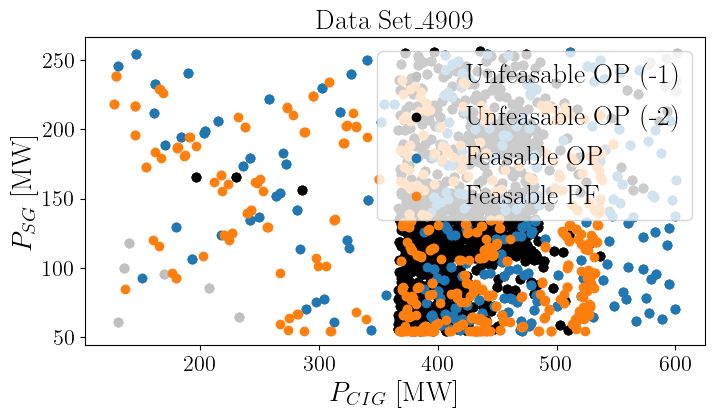

In [11]:
for dataset_ID in dataset_ID_list:

    fig, ax = plt.subplots()
    ax.scatter(dimensions_caseid_unfeasible1_DS[dataset_ID]['p_cig'], dimensions_caseid_unfeasible1_DS[dataset_ID]['p_sg'],color='silver', label='Unfeasable OP (-1)')
    ax.scatter(dimensions_caseid_unfeasible2_DS[dataset_ID]['p_cig'], dimensions_caseid_unfeasible2_DS[dataset_ID]['p_sg'],color='k', label='Unfeasable OP (-2)')
    ax.scatter(dimensions_caseid_feasible_sampled_DS[dataset_ID]['p_cig'], dimensions_caseid_feasible_sampled_DS[dataset_ID]['p_sg'], label='Feasable OP')
    ax.scatter(dimensions_caseid_feasible_DS[dataset_ID]['p_cig'], dimensions_caseid_feasible_DS[dataset_ID]['p_sg'], label='Feasable PF')
    ax.set_xlabel('$P_{CIG}$ [MW]')
    ax.set_ylabel('$P_{SG}$ [MW]')
    plt.legend()
    ax.set_title('Data Set'+dataset_ID)

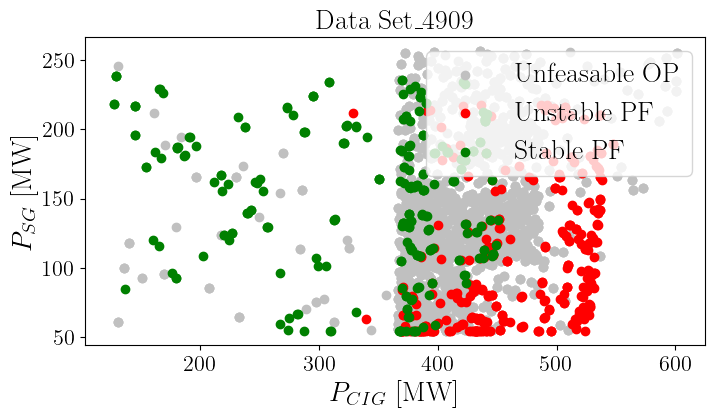

In [12]:
for dataset_ID in dataset_ID_list:

    fig, ax = plt.subplots()
    ax.scatter(dimensions_caseid_unfeasible_DS[dataset_ID]['p_cig'], dimensions_caseid_unfeasible_DS[dataset_ID]['p_sg'],color='silver', label='Unfeasable OP')
    ax.scatter(dimensions_caseid_feasible_DS[dataset_ID].query('Stability ==0')['p_cig'], dimensions_caseid_feasible_DS[dataset_ID].query('Stability ==0')['p_sg'], color='r',label='Unstable PF')
    ax.scatter(dimensions_caseid_feasible_DS[dataset_ID].query('Stability ==1')['p_cig'], dimensions_caseid_feasible_DS[dataset_ID].query('Stability ==1')['p_sg'], color='g', label='Stable PF')
    ax.set_xlabel('$P_{CIG}$ [MW]')
    ax.set_ylabel('$P_{SG}$ [MW]')
    plt.legend()
    ax.set_title('Data Set'+dataset_ID)

Mesh obtained from parsing the logs file of the data generator process: the mesh shows the cell splitting process. It is obtained from the parsing_dimensions.py code.

Plot the mesh on top of the OPs scatter plot.

In [13]:
mesh_df_DS= dict()
for dataset_ID in dataset_ID_list:

    mesh_df_DS[dataset_ID]= pd.read_excel('mesh'+dataset_ID+'.xlsx')

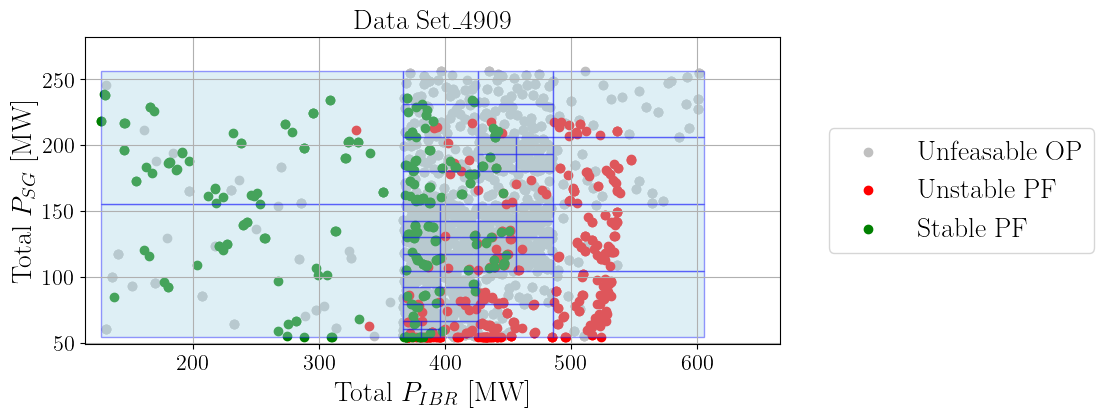

In [19]:
for dataset_ID in dataset_ID_list:

    fig, ax = plt.subplots()
    ax.scatter(dimensions_caseid_unfeasible_DS[dataset_ID]['p_cig'], dimensions_caseid_unfeasible_DS[dataset_ID]['p_sg'],color='silver', label='Unfeasable OP')
    ax.scatter(dimensions_caseid_feasible_DS[dataset_ID].query('Stability ==0')['p_cig'], dimensions_caseid_feasible_DS[dataset_ID].query('Stability ==0')['p_sg'], color='r',label='Unstable PF')
    ax.scatter(dimensions_caseid_feasible_DS[dataset_ID].query('Stability ==1')['p_cig'], dimensions_caseid_feasible_DS[dataset_ID].query('Stability ==1')['p_sg'], color='g', label='Stable PF')
    ax.set_xlabel('$P_{CIG}$ [MW]')
    ax.set_ylabel('$P_{SG}$ [MW]')
    plot_mesh(mesh_df_DS[dataset_ID], ax)
    ax.legend(loc="center left", bbox_to_anchor=(1.05, 0.5))
    ax.set_title('Data Set'+dataset_ID)

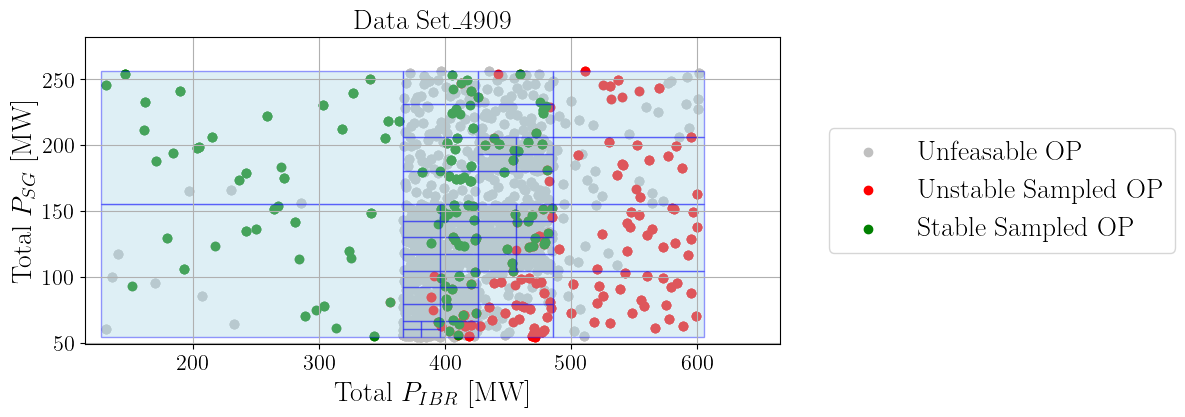

In [20]:
for dataset_ID in dataset_ID_list:

    fig, ax = plt.subplots()
    ax.scatter(dimensions_caseid_unfeasible_DS[dataset_ID]['p_cig'], dimensions_caseid_unfeasible_DS[dataset_ID]['p_sg'],color='silver', label='Unfeasable OP')
    ax.scatter(dimensions_caseid_feasible_sampled_DS[dataset_ID].query('Stability ==0')['p_cig'], dimensions_caseid_feasible_sampled_DS[dataset_ID].query('Stability ==0')['p_sg'], color='r',label='Unstable Sampled OP')
    ax.scatter(dimensions_caseid_feasible_sampled_DS[dataset_ID].query('Stability ==1')['p_cig'], dimensions_caseid_feasible_sampled_DS[dataset_ID].query('Stability ==1')['p_sg'], color='g', label='Stable Sampled OP')
    ax.set_xlabel('$P_{CIG}$ [MW]')
    ax.set_ylabel('$P_{SG}$ [MW]')
    plot_mesh(mesh_df_DS[dataset_ID], ax)
    ax.legend(loc="center left", bbox_to_anchor=(1.05, 0.5))
    ax.set_title('Data Set'+dataset_ID)

Dataframes with the cases_id, the exploration depth at which they have been evaluated and the corresponding cell name (as in the cell_info.csv file).
It is obtained from the parsing_dimensions.py code.

In [21]:
df_depth_DS = dict()
for dataset_ID in dataset_ID_list:
    
    df_depth_DS[dataset_ID]= pd.read_excel('cases_id_depth'+dataset_ID+'.xlsx')

In [22]:
df_depth_DS[dataset_ID_list[0]].query('Depth == 0')['case_id']

60      69bf3e89-4523-4de1-ad2e-daaca5a934eb
61      7f0f9e38-f9b9-478b-88e0-71057dca82d2
62      a57354e1-d535-48fc-ba03-5b1005c8b0d9
63      b12baff7-9984-4b15-bed1-0816f372785f
64      62618df7-14c8-49f5-b7ef-07f958394fad
65      eec974d7-3aaa-43f0-9e0d-685d9d611b46
66      5e2ea9cc-45fa-4b98-8476-a566fc31f5d7
67      76cc8503-5c2b-4a26-b648-215e3c80a264
68      470cf73e-dda6-4126-94f0-e0f2fa6d2a49
69      744c3b1a-e17b-4757-8d82-13d7f9bd841d
70      81ddbf69-fdce-429f-9ccb-d775fd4eb769
71      8ebe120d-c9e1-4de1-a70b-fe41e3448f70
72      9b0b8435-f9ff-4110-ab37-89ab65e65d9d
73      f50b28bf-40ec-48fd-94e3-584bc43e9fdb
74      ed29e5d0-676d-45bc-9d2e-3d6dce462df4
1185    2ea8cbcd-ab16-46d6-be3d-401075a0ed43
1186    6875a320-fec9-485c-8bf5-eae8a0d0e581
1187    238d681e-2a98-4fe7-a73b-09cae18a7ad1
1188    d000f690-d498-483c-bb4b-cd687c8f53d2
1189    309dc21b-cb94-4d68-b406-12ed18a4b752
1190    dee95a25-81cb-4a4a-a97c-7fd3609c1db8
1191    3b4d767c-2622-4554-8a1a-aab64faa8856
1192    e9

In [23]:
df_feasibility_balancing_DS=dict()

for dataset_ID in dataset_ID_list:

    df_feasibility_balancing_DS[dataset_ID]= pd.DataFrame(columns=['depth','feasibility','cumulative_feasibility','feasiblity_no_2','balance','cumulative_balancing'])
    cum_case_id_depth=[]
    for idx, depth in enumerate(np.sort(df_depth_DS[dataset_ID]['Depth'].unique())):
        df_feasibility_balancing_DS[dataset_ID].loc[idx, 'depth']=depth
        case_id_depth = df_depth_DS[dataset_ID].query('Depth == @depth')['case_id']
        cum_case_id_depth.extend(case_id_depth)
        feas_case_id_depth = list(set(case_id_depth) & set(case_id_feasible_DS[dataset_ID]))
        cum_feas_case_id_depth = list(set(cum_case_id_depth) & set(case_id_feasible_DS[dataset_ID]))
        
        df_feasibility_balancing_DS[dataset_ID].loc[idx, 'feasibility']= len(feas_case_id_depth)/len(case_id_depth) 
        df_feasibility_balancing_DS[dataset_ID].loc[idx, 'cumulative_feasibility']= len(cum_feas_case_id_depth)/len(cum_case_id_depth) 
    
        feas_stab_depth = len(results_dataframes_datasets[dataset_ID]['cases_df_feasible'].query('case_id == @feas_case_id_depth and Stability ==1'))
        cum_feas_stab_case_id_depth = len(results_dataframes_datasets[dataset_ID]['cases_df_feasible'].query('case_id == @cum_feas_case_id_depth and Stability ==1'))

        if len(feas_case_id_depth) !=0:
            df_feasibility_balancing_DS[dataset_ID].loc[idx, 'balance']= feas_stab_depth/len(feas_case_id_depth) 
        else:
             df_feasibility_balancing_DS[dataset_ID].loc[idx, 'balance'] = 0
        
        if len(cum_feas_case_id_depth) !=0:
            df_feasibility_balancing_DS[dataset_ID].loc[idx, 'cumulative_balancing']= cum_feas_stab_case_id_depth/len(cum_feas_case_id_depth) 
        else:
            df_feasibility_balancing_DS[dataset_ID].loc[idx, 'cumulative_balancing']= 0
    

In [24]:
df_feasibility_balancing_DS[dataset_ID_list[0]]

,depth,feasibility,cumulative_feasibility,feasiblity_no_2,balance,cumulative_balancing
0,0,0.783333,0.783333,NaN,0.680851,0.680851
1,1,0.670833,0.693333,NaN,0.608696,0.625
2,2,0.510417,0.580769,NaN,0.240816,0.417219
3,3,0.161458,0.349425,NaN,0.464516,0.429276
4,4,0.003571,0.179532,NaN,0.666667,0.431596
5,5,0.0,0.16776,NaN,0,0.431596


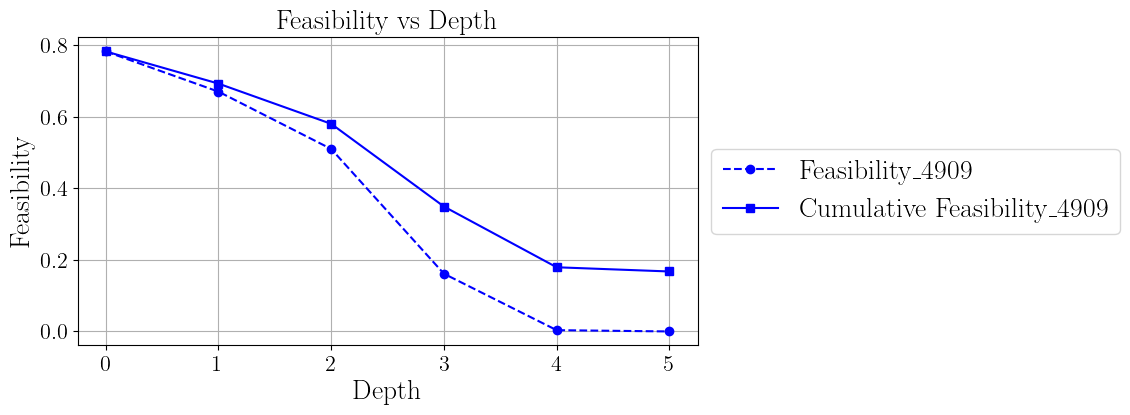

In [25]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is called df
# Plot 1: Feasibility
cls=['b','r']
fig, ax = plt.subplots()

for idx, dataset_ID in enumerate(dataset_ID_list):
    ax.plot(df_feasibility_balancing_DS[dataset_ID]['depth'], df_feasibility_balancing_DS[dataset_ID]['feasibility'], marker='o',color=cls[idx],linestyle='--', label='Feasibility'+dataset_ID)
    ax.plot(df_feasibility_balancing_DS[dataset_ID]['depth'], df_feasibility_balancing_DS[dataset_ID]['cumulative_feasibility'], marker='s',color=cls[idx], label='Cumulative Feasibility'+dataset_ID)
ax.set_xlabel('Depth')
ax.set_ylabel('Feasibility')
ax.set_title('Feasibility vs Depth')
ax.grid(True)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


very large difference in feasibility ratio when exploring at depth >=4 

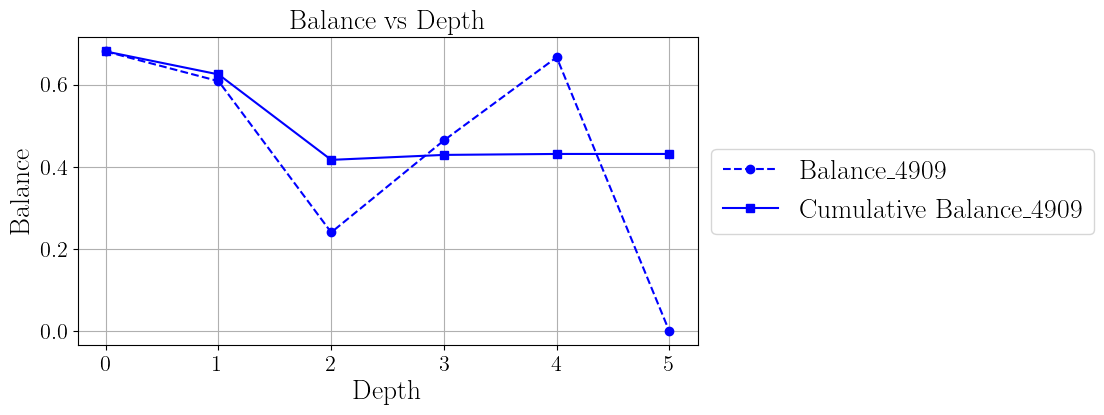

In [26]:
# Plot 2: Balancing

cls=['b','r']
fig, ax = plt.subplots()

for idx, dataset_ID in enumerate(dataset_ID_list):
    ax.plot(df_feasibility_balancing_DS[dataset_ID]['depth'], df_feasibility_balancing_DS[dataset_ID]['balance'], marker='o',color=cls[idx],linestyle='--', label='Balance'+dataset_ID)
    ax.plot(df_feasibility_balancing_DS[dataset_ID]['depth'], df_feasibility_balancing_DS[dataset_ID]['cumulative_balancing'], marker='s',color=cls[idx], label='Cumulative Balance'+dataset_ID)
ax.set_xlabel('Depth')
ax.set_ylabel('Balance')
ax.set_title('Balance vs Depth')
ax.grid(True)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

very large difference in classes balance ratio since the beginning of the exporation, then both tend to 0.5 more or less (that is ok)

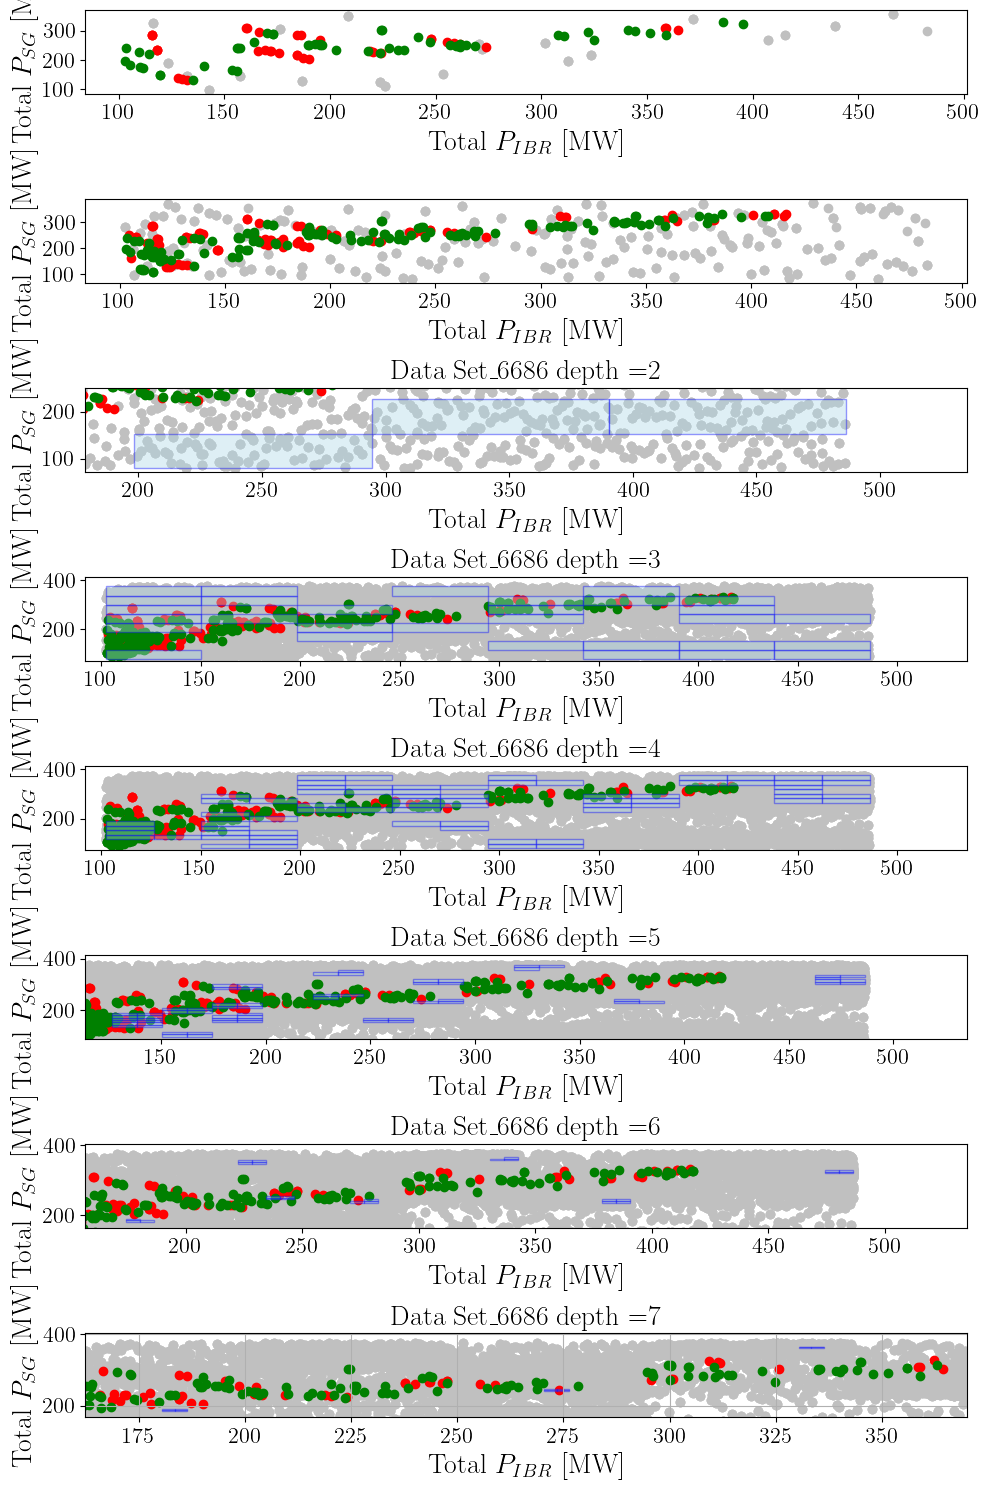

In [55]:
max_depth= df_depth_DS[dataset_ID_list[0]]['Depth'].max()#max(df_depth_DS[dataset_ID_list[0]]['Depth'].max(),df_depth_DS[dataset_ID_list[1]]['Depth'].max())
fig, axes = plt.subplots(nrows=max_depth+1,ncols=len(dataset_ID_list), figsize=(10,15))
for idx_DS, dataset_ID in enumerate(dataset_ID_list):
    
    for idx, depth in enumerate(np.sort(df_depth_DS[dataset_ID]['Depth'].unique())):
        case_id_depth = df_depth_DS[dataset_ID].query('Depth <= @depth')['case_id']
        feas_case_id_depth = list(set(case_id_depth) & set(case_id_feasible_DS[dataset_ID]))
        unfeas_case_id_depth = list(set(case_id_depth) & set(case_id_Unfeasible_DS[dataset_ID]))

        try:
            ax = axes[idx,idx_DS]
        except:
            ax = axes[idx]
        ax.scatter(dimensions_caseid_unfeasible_DS[dataset_ID].query('case_id ==@unfeas_case_id_depth')['p_cig'], dimensions_caseid_unfeasible_DS[dataset_ID].query('case_id ==@unfeas_case_id_depth')['p_sg'],color='silver', label='Unfeasable OP')
        ax.scatter(dimensions_caseid_feasible_DS[dataset_ID].query('Stability ==0 and case_id ==@feas_case_id_depth')['p_cig'], dimensions_caseid_feasible_DS[dataset_ID].query('Stability ==0 and case_id ==@feas_case_id_depth')['p_sg'], color='r',label='Unstable OP')
        ax.scatter(dimensions_caseid_feasible_DS[dataset_ID].query('Stability ==1 and case_id ==@feas_case_id_depth')['p_cig'], dimensions_caseid_feasible_DS[dataset_ID].query('Stability ==1 and case_id ==@feas_case_id_depth')['p_sg'], color='g',label='Stable OP')

        ax.set_xlabel('$P_{CIG}$ [MW]')
        ax.set_ylabel('$P_{SG}$ [MW]')

        try:
            plot_mesh(mesh_df_DS[dataset_ID].query('depth == @depth'), ax)
        except:
            continue
        #plt.legend()
        ax.set_title('Data Set'+dataset_ID+' depth ='+str(depth))



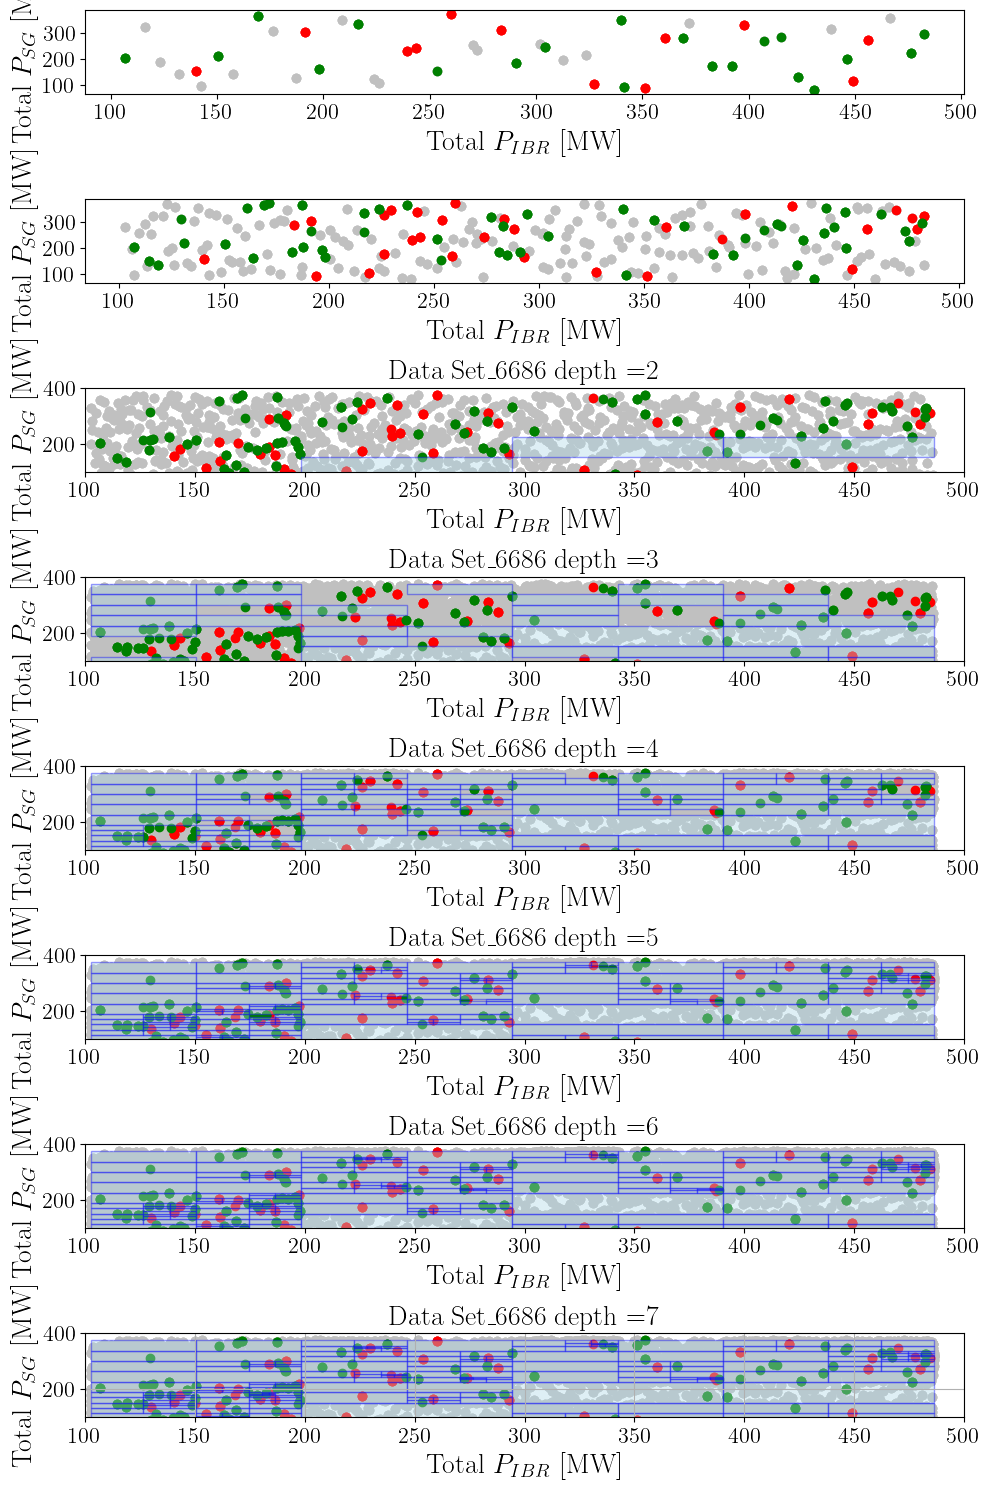

In [60]:
max_depth= df_depth_DS[dataset_ID_list[0]]['Depth'].max()#max(df_depth_DS[dataset_ID_list[0]]['Depth'].max(),df_depth_DS[dataset_ID_list[1]]['Depth'].max())
fig, axes = plt.subplots(nrows=max_depth+1,ncols=len(dataset_ID_list), figsize=(10,15))
for idx_DS, dataset_ID in enumerate(dataset_ID_list):
    
    for idx, depth in enumerate(np.sort(df_depth_DS[dataset_ID]['Depth'].unique())):
        case_id_depth = df_depth_DS[dataset_ID].query('Depth <= @depth')['case_id']
        feas_case_id_depth = list(set(case_id_depth) & set(case_id_feasible_DS[dataset_ID]))
        unfeas_case_id_depth = list(set(case_id_depth) & set(case_id_Unfeasible_DS[dataset_ID]))

        try:
            ax = axes[idx,idx_DS]
        except:
            ax = axes[idx]
        ax.scatter(dimensions_caseid_unfeasible_DS[dataset_ID].query('case_id ==@unfeas_case_id_depth')['p_cig'], dimensions_caseid_unfeasible_DS[dataset_ID].query('case_id ==@unfeas_case_id_depth')['p_sg'],color='silver', label='Unfeasable OP')
        ax.scatter(dimensions_caseid_feasible_sampled_DS[dataset_ID].query('Stability ==0 and case_id ==@feas_case_id_depth')['p_cig'], dimensions_caseid_feasible_sampled_DS[dataset_ID].query('Stability ==0 and case_id ==@feas_case_id_depth')['p_sg'], color='r',label='Unstable OP')
        ax.scatter(dimensions_caseid_feasible_sampled_DS[dataset_ID].query('Stability ==1 and case_id ==@feas_case_id_depth')['p_cig'], dimensions_caseid_feasible_sampled_DS[dataset_ID].query('Stability ==1 and case_id ==@feas_case_id_depth')['p_sg'], color='g',label='Stable OP')

        ax.set_xlabel('$P_{CIG}$ [MW]')
        ax.set_ylabel('$P_{SG}$ [MW]')

        try:
            plot_mesh(mesh_df_DS[dataset_ID].query('depth <= @depth'), ax)
        except:
            continue
        #plt.legend()
        ax.set_title('Data Set'+dataset_ID+' depth ='+str(depth))
        ax.set_xlim([100,500])        
        ax.set_ylim([100,400])

<Axes: xlabel='Total $P_{IBR}$ [MW]', ylabel='Total $P_{SG}$ [MW]'>

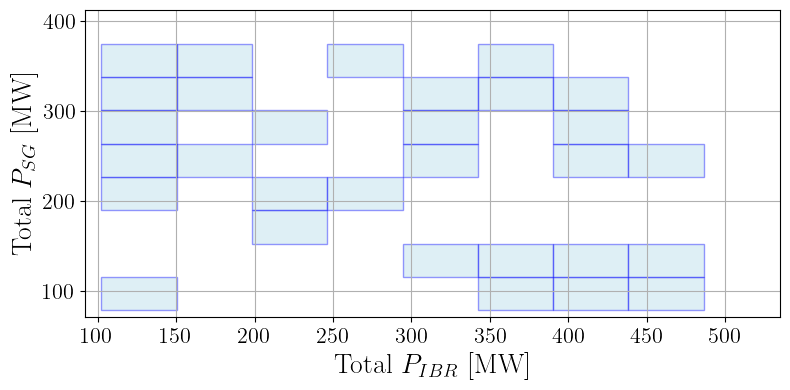

In [52]:
plot_mesh(mesh_df_DS[dataset_ID].query('depth == 3'))

In [ ]:
From depth >=4 **Data Set 7665** focuses on regions with low PSG and PIBR that **Data Set 7664** discarded because totally unfeasible

## Comparison of Models Accuracy
Accuracy is obtained by performing:
- k-fold cross validation on data sets subsets (adding samples generated at each exploration depth)
- using XGBoosting (no hyperparameters tuning)
- after data cleaning and correlated variables removal (by hierarchical clustering approach)
  
[see Post_processing notebook]

In [63]:
scores_df_uncorr_HierCl_DS=dict()
for idx_DS, dataset_ID in enumerate(dataset_ID_list):
    scores_df_uncorr_HierCl_DS[dataset_ID]= pd.read_excel('scores_df_uncorr_HierCl_xgb'+dataset_ID+'.xlsx')


<>:8: SyntaxWarning: invalid escape sequence '\p'
<>:8: SyntaxWarning: invalid escape sequence '\p'
C:\Users\Francesca\AppData\Local\Temp\ipykernel_8520\681942644.py:8: SyntaxWarning: invalid escape sequence '\p'
  ax.set_ylabel('Mean accuracy $\pm$ std')


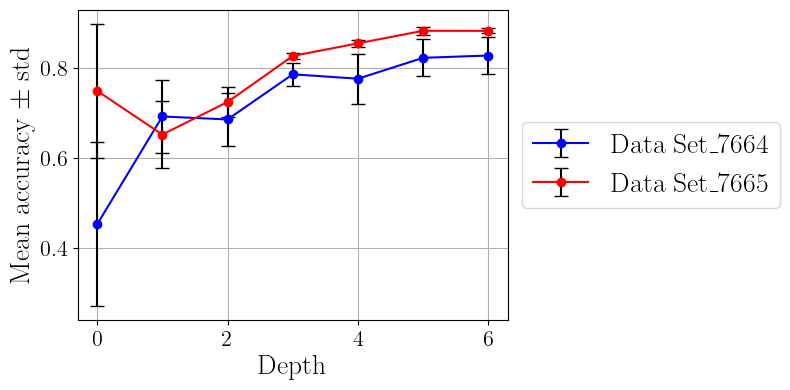

In [65]:
#%%
fig, ax = plt.subplots()
cls=['b','r']
for idx_DS, dataset_ID in enumerate(dataset_ID_list):
    ax.errorbar(scores_df_uncorr_HierCl_DS[dataset_ID]['Depth'], scores_df_uncorr_HierCl_DS[dataset_ID]['score_mean'], yerr=scores_df_uncorr_HierCl_DS[dataset_ID]['score_std'], fmt='-o', capsize=5, color=cls[idx_DS], ecolor='black', elinewidth=1.5, label = 'Data Set'+dataset_ID)

ax.set_xlabel('Depth')
ax.set_ylabel('Mean accuracy $\pm$ std')
ax.grid()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
fig.tight_layout()
#plt.savefig('scores_vs_depth__df_uncorr_var_HierCl_xgb.pdf')#, format='pdf')
#plt.savefig('scores_vs_depth__df_uncorr_var_HierCl_xgb.png')#, format='png')

In [68]:
scores_df_uncorr_HierCl_DS[dataset_ID_list[1]]

,Unnamed: 0,Depth,score_mean,score_std,n_training_cases,perc_stable
0,0,0,0.750000,0.148324,24,0.708333
1,1,1,0.652910,0.074162,138,0.688406
2,2,2,0.725182,0.034213,422,0.675355
3,3,3,0.827519,0.007605,1461,0.670089
4,4,4,0.855579,0.007357,3926,0.665308
5,5,5,0.883522,0.008316,6894,0.666667
6,6,6,0.883258,0.005689,7084,0.665726
